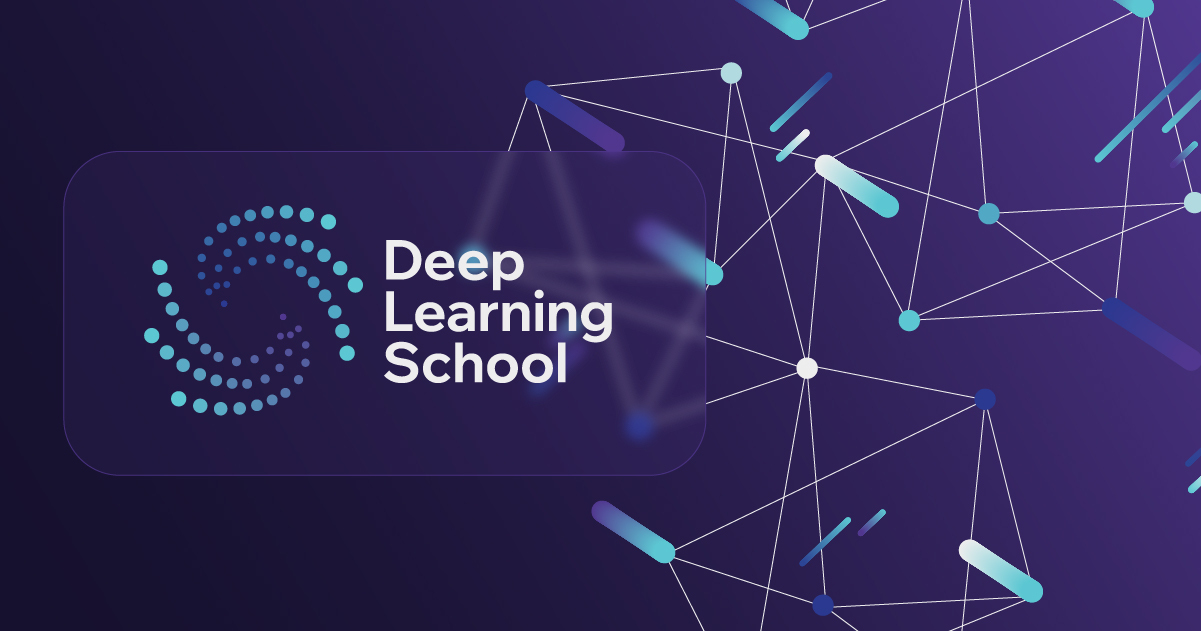

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

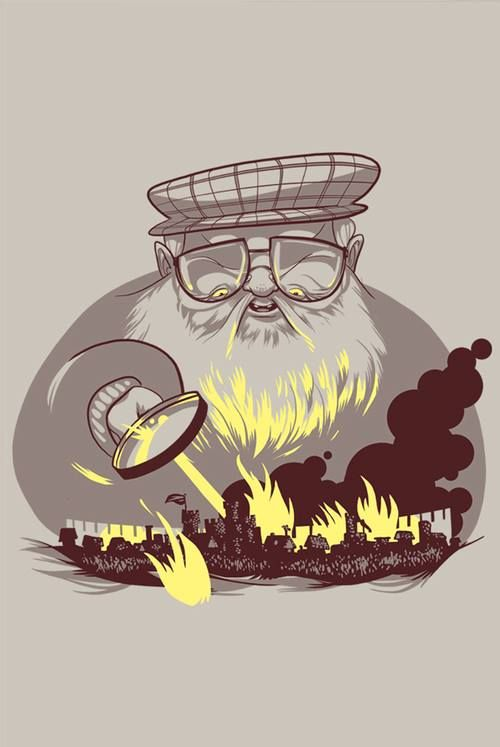

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 18.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 20.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5]:
df = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')

In [6]:
df.head(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,1,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [7]:
print('Кол-во строк в Датасете:', df['name'].count())
print('----------------------------')
print(df.isna().sum())

Кол-во строк в Датасете: 1557
----------------------------
name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


Обратим внимания на столбцы **dateOfBirth, mother, father, heir, spouse, isAliveMother, isAliveFather, isAliveHeir, age**. Можно удалить эти столбцы, так как у них много пропущенных значений и они вряд ли помогут модели.

In [8]:
df = df.drop(columns=['dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'age'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   house             1176 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isAliveSpouse     200 non-null    float64
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usag

Посмотрим на данные из столбцов **title,
culture, isAliveSpouse** для того, чтобы решить, как заполнить данные


**1) title** содержит ценные данные о социальном статусе персонажей. Следовательно, стоит заполнить пропуски, хоть они и многочисленны.
- Объединим близкие по значению титулы
- Титулы, относящиеся к малому кол-ву персонажей обозначим как 'Other'
- Пропущенные значения заполним логически или с помощью 'Unknown'

In [10]:
df['title'].value_counts()[0:60]

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


In [11]:
df['title'] = df['title'].str.strip().str.extract(r'^(\S+)', expand=False)
df['title'] = df['title'].replace(["Shatterstone", "Sandstone", "Rills", "Hightower", "Banefort", "Nightsong",
    "Maidenpool", "Dragonstone", "Eastwatch-by-the-Sea", "Cobblecat", "Foamdrinker",
    "Rain", "Salt", "Sealskin", "Acorn", "Ten", "Longsister", "Light", "Grey", "The"], 'Other')

df['title'] = df['title'].replace('Knight', 'Ser')
df['title'] = df['title'].replace('Wisdom', 'Septon')
df['title'] = df['title'].replace('Wisdom', 'Septon')



In [12]:
def fill_missing_title(row):
    if pd.notna(row['title']):
        return row['title']

    if row['house'] == "Night's Watch":
        return "Brother"

    if row['culture'] == "Wildling":
        return "Wildling"

    if pd.notna(row['house']):
        return "Lord" if row['male'] == 1 else "Lady"

    return "Unknown"

In [144]:
df['title'] = df.apply(fill_missing_title, axis=1)

In [145]:
top_title = df['title'].value_counts().index[:18]
df['title'] = df['title'].apply(lambda x: x if x in top_title else "Unknown")

In [13]:
df['title'].value_counts()

,count
title,
Ser,309
Lord,63
Maester,29
Archmaester,21
Septon,21
...,...
Godsgrace,1
Pinkmaiden,1
Harridan,1


**2) Culture** содержит 488 значений из 1557. Попробуем заполнить пропуски, чтобы далее посмотреть на корреляцию с целевым признаком

In [12]:
# df['culture'].value_counts()[0:12]

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [62]:
# top_cultures = df['culture'].value_counts().index[:10]
# df['culture'] = df['culture'].apply(lambda x: x if x in top_cultures else "Other")

**3) В столбце house** текст, выделенный полужирным шрифтом Заполним пропуски по примеру пункта (2)

In [14]:
df['house'].value_counts()[0:15]

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20
Faith of the Seven,15


In [15]:
top_houses = df['house'].value_counts().index[:10]
df['house'] = df['house'].apply(lambda x: x if x in top_houses else "Other")

In [16]:
df['house'].value_counts()

,count
house,
Other,1138
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20


**4) В столбце isAliveSpouse** всего 200 пропусков, заполним их модой

In [17]:
df['isAliveSpouse'].value_counts()

,count
isAliveSpouse,
1.0,158
0.0,42


In [18]:
df['isAliveSpouse'].fillna(df['isAliveSpouse'].mode()[0], inplace=True)

<ipython-input-18-14a667fe4274>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['isAliveSpouse'].fillna(df['isAliveSpouse'].mode()[0], inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   house             1557 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isAliveSpouse     1557 non-null   float64
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usag

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [20]:
df['isPopular'] = (df['popularity'] >= 0.5).astype(int)
df['boolDeadRelations'] = (df['numDeadRelations'] > 0).astype(int)

In [21]:
import numpy as np
import pandas as pd

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}


def simplify_culture(culture):
    if pd.isna(culture):
        return 'Other'
    culture = culture.lower().strip()
    for key, values in cult.items():
        if culture in values:
            return key
    return culture

df['culture'] = df['culture'].apply(simplify_culture)


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isAliveSpouse      1557 non-null   float64
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  numDeadRelations   1557 non-null   int64  
 14  popularity         1557 non-null   float64
 15  isAlive            1557 non-null   int64  
 16  isPopular          1557 non-n

Удалим столбцы popularity, numDeadRelations, так как мы упростили признаки и создали на их основе новые
Также удалим name, так как столбец не влияет на предсказание

In [23]:
df.drop(columns=['popularity', 'numDeadRelations', 'name'], inplace = True)

In [24]:
correlation = df[['isAliveSpouse', 'isMarried', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAlive']].corr()['isAlive'].drop('isAlive')

print(correlation)

isAliveSpouse    0.063894
isMarried       -0.049381
book1           -0.112468
book2           -0.055998
book3            0.018427
book4            0.284014
book5            0.032531
Name: isAlive, dtype: float64


In [25]:
df.head(3)

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,NaN,1,Other,Other,0,0,0,0,0,1.0,0,0,0,1,1
2,Lord,1,rivermen,House Frey,1,1,1,1,1,1.0,1,1,1,1,1
3,Ser,1,Other,Other,0,0,0,1,0,1.0,0,1,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

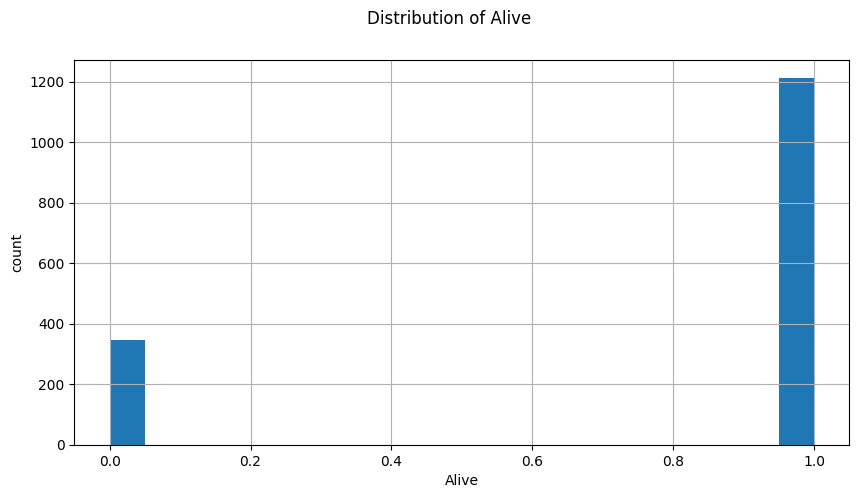

In [26]:
plt.figure(figsize = (10, 5))

df['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

- Мы видим, что значения целевой переменной несбалансированы: гораздо больше живых персонажей (1), чем мертвых (0).
- Переменная категориальная

Так как значения целевой переменной сильно несбалансированы, при обучении модели будем использовать взвешивание классов в модели (указажем модели учитывать дисбаланс классов, увеличивая штраф за ошибки на минорном классе)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

Выведем, какие колонки у нас есть:

In [27]:
df.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'isAlive',
       'isPopular', 'boolDeadRelations'],
      dtype='object')

Заведем список категориальных колонок:

In [28]:
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'isAlive',
       'isPopular', 'boolDeadRelations']

In [29]:
categorical_features = df[categorical_columns]

In [30]:
categorical_features

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,NaN,1,Other,Other,0,0,0,0,0,1.0,0,0,0,1,1
2,Lord,1,rivermen,House Frey,1,1,1,1,1,1.0,1,1,1,1,1
3,Ser,1,Other,Other,0,0,0,1,0,1.0,0,1,1,0,0
4,Queen,0,Other,Other,0,0,0,0,0,0.0,1,1,0,0,0
5,Greenstone,0,Dornish,Other,0,0,0,1,0,1.0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Other,Other,1,0,1,1,0,1.0,0,1,1,0,0
1554,NaN,0,Other,Other,1,1,0,0,0,1.0,0,0,0,0,0
1555,NaN,1,Other,Other,0,1,1,1,1,1.0,0,0,0,0,0


Найдем среди категориальных колонок те, значения в которых не числовые:

In [31]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [32]:
unprocessed_cat_features

['title', 'culture', 'house']

**Label Encoding**

Будем использовать Label Encoding, так как кол-во категорий слишком велико, чтобы использовать One-hot encoding.
В этом случае каждому уникальному значению столбца присваивается уникальное целочисленное значение.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoding = LabelEncoder()

for column in unprocessed_cat_features:
  df[column] = label_encoding.fit_transform(df[column])

In [35]:
df.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,124,1,9,10,0,0,0,0,0,1.0,0,0,0,1,1
2,70,1,27,1,1,1,1,1,1,1.0,1,1,1,1,1
3,97,1,9,10,0,0,0,1,0,1.0,0,1,1,0,0
4,85,0,9,10,0,0,0,0,0,0.0,1,1,0,0,0
5,45,0,2,10,0,0,0,1,0,1.0,1,1,1,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

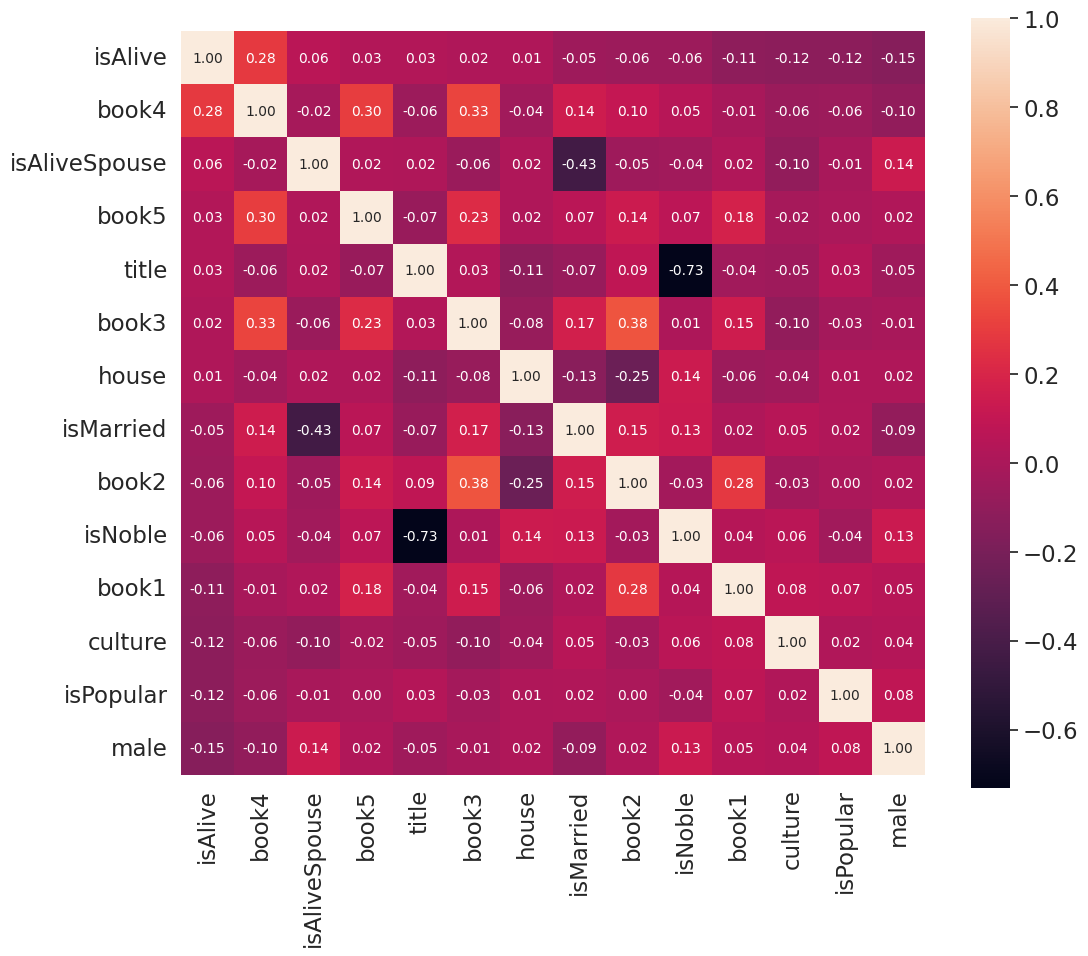

In [46]:
corrmat = df.corr()
k = 14
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Давайте нарисуем круговую диаграмму живых персонажей в зависимости от пола обслуживания.

Text(0.5, 1.0, 'male = Женщина')

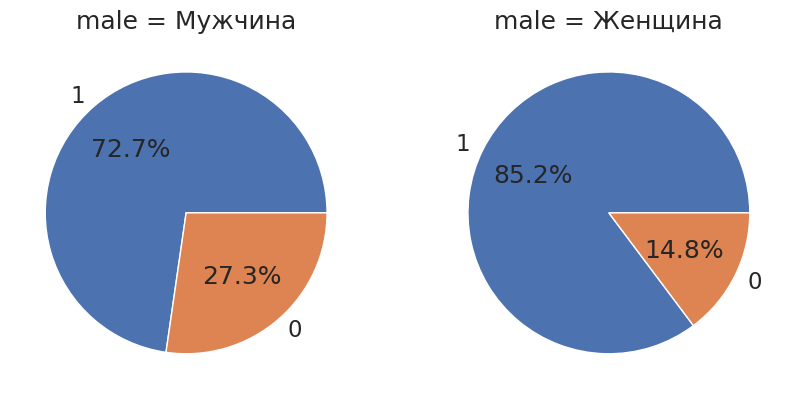

In [47]:
data1 = df[df['male'] == 1]['isAlive'].value_counts()
data2 = df[df['male'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("male = Мужчина")
ax2.set_title("male = Женщина")

Можно заметить, что процент выживших женщин больше, чем мужчин.

Также нарисуем круговую диаграмму живых персонажей в зависимости от столбца isPopular (популярность героя)

Text(0.5, 1.0, 'isPopular = Непопулярен')

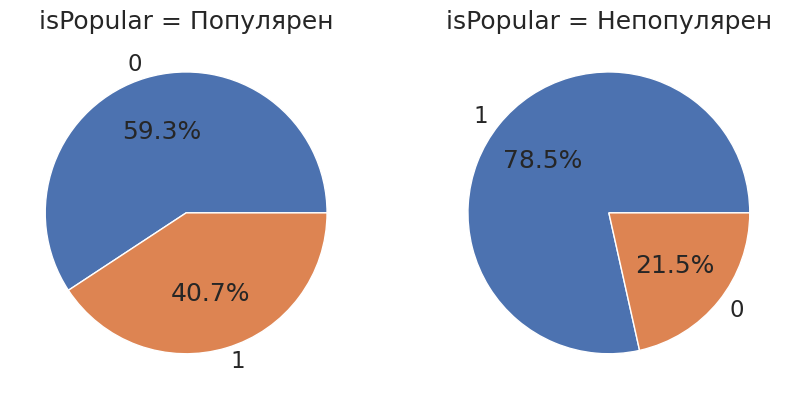

In [48]:
data1 = df[df['isPopular'] == 1]['isAlive'].value_counts()
data2 = df[df['isPopular'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isPopular = Популярен")
ax2.set_title("isPopular = Непопулярен")

Можно заметить, что непопулярные персонажи чаще остаются в живых, нежели популярные

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [49]:
X = df.drop(columns = ['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

**Маштабирование данных**

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [1.02714056e+02 5.91164659e-01 1.01799197e+01 8.70040161e+00
 1.38152610e-01 3.29317269e-01 4.32931727e-01 5.51004016e-01
 3.26907631e-01 9.68674699e-01 1.33333333e-01 4.33734940e-01
 1.84738956e-02 4.81927711e-02]
После масштабирования:  [ 2.95881124e-16  1.35188603e-16 -2.78670438e-16  1.33672636e-16
 -4.08151870e-16 -3.30480846e-16  1.43927708e-16  3.97896798e-16
 -2.36134182e-16 -9.39721304e-16 -8.91745401e-20 -1.32424192e-16
  2.48796967e-16 -1.85705980e-16]


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [71]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [73]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [74]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(class_weight='balanced', C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [57]:
# Шаг 1. создание модели
adaboost_classifier = AdaBoostClassifier()
random_forest_classifier = RandomForestClassifier(class_weight='balanced')
gaussian_process_classifier = GaussianProcessClassifier()
gaussian_NB = GaussianNB()
kneighbors_classifier = KNeighborsClassifier()
svc = SVC(class_weight='balanced')
decision_tree_classifier = DecisionTreeClassifier(class_weight='balanced')


if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

# Шаг 2. обучение модели
adaboost_classifier.fit(X_train, y_train, sample_weight=(y_train.map({0: 1.5, 1: 1})))
random_forest_classifier.fit(X_train, y_train)
gaussian_process_classifier.fit(X_train, y_train)
gaussian_NB.fit(X_train, y_train)
kneighbors_classifier.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_adaboost_classifier = adaboost_classifier.predict(X_test)
y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)
y_pred_gaussian_process_classifier = gaussian_process_classifier.predict(X_test)
y_pred_gaussian_NB = gaussian_NB.predict(X_test)
y_pred_kneighbors_classifier = kneighbors_classifier.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_decision_tree_classifier = decision_tree_classifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [58]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [59]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6667


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [64]:
# Шаг 3. Предсказание на тестовых данных
y_pred_adaboost_classifier = adaboost_classifier.predict(X_test)
y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)
y_pred_gaussian_process_classifier = gaussian_process_classifier.predict(X_test)
y_pred_gaussian_NB = gaussian_NB.predict(X_test)
y_pred_kneighbors_classifier = kneighbors_classifier.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_decision_tree_classifier = decision_tree_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_1 = accuracy_score(y_test, y_pred_adaboost_classifier)
accuracy_2 = accuracy_score(y_test, y_pred_random_forest_classifier)
accuracy_3 = accuracy_score(y_test, y_pred_gaussian_process_classifier)
accuracy_4 = accuracy_score(y_test, y_pred_gaussian_NB)
accuracy_5 = accuracy_score(y_test, y_pred_kneighbors_classifier)
accuracy_6 = accuracy_score(y_test, y_pred_svc)
accuracy_7 = accuracy_score(y_test, y_pred_decision_tree_classifier)

print("Accuracy for adaboost_classifier: %.4f" % accuracy_1, "\n",
      "Accuracy for random_forest_classifier: %.4f" % accuracy_2, "\n",
      "Accuracy for gaussian_process_classifier: %.4f" % accuracy_3, "\n",
      "Accuracy for gaussian_NB: %.4f" % accuracy_4, "\n",
      "Accuracy for kneighbors_classifier: %.4f" % accuracy_5, "\n",
      "Accuracy for svc: %.4f" % accuracy_6, "\n",
      "Accuracy for decision_tree_classifier: %.4f" % accuracy_7, "\n")

Accuracy for adaboost_classifier: 0.7724 
 Accuracy for random_forest_classifier: 0.7660 
 Accuracy for gaussian_process_classifier: 0.8013 
 Accuracy for gaussian_NB: 0.7917 
 Accuracy for kneighbors_classifier: 0.7821 
 Accuracy for svc: 0.5897 
 Accuracy for decision_tree_classifier: 0.7404 



Проверим устойчивость модели с помощью кросс-валидации

In [68]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.gaussian_process import GaussianProcessClassifier

# Определяем метрики
scoring = {'accuracy': make_scorer(accuracy_score)}

# Кросс-валидация модели GaussianProcessClassifier
scores = cross_validate(GaussianProcessClassifier(random_state=44), X, y,
                        scoring=scoring,
                        return_train_score=True)

# Вывод результатов
print('Accuracy train mean = ', scores['train_accuracy'].mean())
print('Accuracy test mean = ', scores['test_accuracy'].mean())

Accuracy train mean =  0.8770073552637516
Accuracy test mean =  0.7745094401846814


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)